<h1>IDA Lab Week7 Ex1: Clustering</h1>
<h2>By Smeet Dedhia Reg: 200968236</h2>

<h4>1]Summary of Online Retail Metadata:</h4><br>
This is a transnational dataset for a UK-based and registered non-store online retail<br><br>
Occuring between 01/12/2010 and 09/12/2011<br><br>
The Company mainly sells unique all-occasion gifts<br><br>
Many customers of the company are wholesalers<br><br>

<h4>Attribute Information:</h4>

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.<br><br>
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.<br><br>
Description: Product (item) name. Nominal.<br><br>
Quantity: The quantities of each product (item) per transaction. Numeric.<br><br>
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.<br><br>
UnitPrice: Unit price. Numeric, Product price per unit in sterling.<br><br>
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.<br><br>
Country: Country name. Nominal, the name of the country where each customer resides.<br><br>

<h4>Info about Calculated Parameters:</h4><br>
<b>R (Recency)</b><br>
Recency should be calculated as the number of months before he or she has made a purchase from the online store. If he/she made a purchase in the month of December 2011, then the Recency should be 0. If purchase is made in November 2011 then Recency should be 1 and so on and so forth.<b><br>
<b>F (Frequency)</b><br>
Number of invoices by the customer from 01/04/ 2011 and 09/12/2011.<br><br>
<b>M (Monetary Value)</b><br>
Total spend by the customer from 01/04/ 2011 and 09/12/2011.


In [4]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [9]:
#Read excel file "Online Retail.xlsx to DataFrame OnlineRetail"
OnlineRetail = pd.read_excel('Online Retail.xlsx')
OnlineRetail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
#Checking basic info of OnlineRetail DataFrame
OnlineRetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [417]:
#Selecting transaction which occured between 01/04/ 2011 and 09/12/2011and create a dataset OR2
OR1 = OnlineRetail[OnlineRetail['InvoiceDate']>'2011-04-01']
OR2 = OR1[OR1['InvoiceDate']<'2011-12-09']
OR2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08 20:01:00,0.79,12748.0,United Kingdom
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08 20:01:00,1.25,12748.0,United Kingdom
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08 20:01:00,9.95,12748.0,United Kingdom
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08 20:01:00,2.08,12748.0,United Kingdom


In [22]:
#Verifying date range for DataSet OR2
OR2.InvoiceDate.min()

Timestamp('2011-04-01 08:22:00')

In [23]:
OR2.InvoiceDate.max()

Timestamp('2011-12-08 20:01:00')

In [353]:
#Metadata mentions that dataset contains cancelled orders. These cancelled orders must be removed.
OR2[OR2['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142270,C548564,20750,RED RETROSPOT MINI CASES,-1,2011-04-01 10:22:00,7.95,12616.0,France
142328,C548573,22762,CUPBOARD 3 DRAWER MA CAMPAGNE,-8,2011-04-01 10:45:00,12.75,15045.0,United Kingdom
142329,C548576,84632,DECORATIVE HANGING SHELVING UNIT,-1,2011-04-01 10:46:00,59.95,15696.0,United Kingdom
142330,C548576,22487,WHITE WOOD GARDEN PLANT LADDER,-1,2011-04-01 10:46:00,9.95,15696.0,United Kingdom
142331,C548576,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,-1,2011-04-01 10:46:00,4.25,15696.0,United Kingdom
...,...,...,...,...,...,...,...,...
540090,C581466,21535,RED RETROSPOT SMALL MILK JUG,-2,2011-12-08 19:20:00,2.55,13883.0,United Kingdom
540091,C581466,21232,STRAWBERRY CERAMIC TRINKET POT,-1,2011-12-08 19:20:00,1.25,13883.0,United Kingdom
540141,C581468,21314,SMALL GLASS HEART TRINKET POT,-10,2011-12-08 19:26:00,2.10,13599.0,United Kingdom
540142,C581468,22098,BOUDOIR SQUARE TISSUE BOX,-12,2011-12-08 19:26:00,0.39,13599.0,United Kingdom


In [365]:
#Around 7.6K Cancelled orders are removed and the rest are stored in DataFrame OR3
OR3 = OR2.loc[OR2.Quantity>0]
OR3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08 20:01:00,0.79,12748.0,United Kingdom
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08 20:01:00,1.25,12748.0,United Kingdom
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08 20:01:00,9.95,12748.0,United Kingdom
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08 20:01:00,2.08,12748.0,United Kingdom


In [376]:
#Finding unique CustomerIDs and storing them in an array
CustomerID = OR3['CustomerID'].unique()
CustomerID

array([18161., 14886., 17613., ..., 16833., 14569., 13077.])

In [418]:
#Creating DataFrame for storing RFM values for each customer
RFM = pd.DataFrame(columns = ['CustomerID','Recency', 'Frequency','Monetary Value'])
RFM['CustomerID'] = CustomerID
RFM

,CustomerID,Recency,Frequency,Monetary Value
0,18161.0,NaN,NaN,NaN
1,14886.0,NaN,NaN,NaN
2,17613.0,NaN,NaN,NaN
3,12523.0,NaN,NaN,NaN
4,13694.0,NaN,NaN,NaN
...,...,...,...,...
3845,17830.0,NaN,NaN,NaN
3846,13298.0,NaN,NaN,NaN
3847,16833.0,NaN,NaN,NaN
3848,14569.0,NaN,NaN,NaN


In [380]:
#Sorting Rows by CustomerID
RFM.sort_values(by ='CustomerID',inplace = True)
RFM

,CustomerID,Recency,Frequency,Monetary Value
208,12347.0,NaN,NaN,NaN
139,12348.0,NaN,NaN,NaN
3670,12349.0,NaN,NaN,NaN
2756,12352.0,NaN,NaN,NaN
1364,12353.0,NaN,NaN,NaN
...,...,...,...,...
1727,18281.0,NaN,NaN,NaN
2360,18282.0,NaN,NaN,NaN
755,18283.0,NaN,NaN,NaN
1392,18287.0,NaN,NaN,NaN


In [382]:
#Loop for calculating R, F, M values for each customer; and storing in RFM DataFrame

for CID in CustomerID:
    RFM.loc[RFM.CustomerID==CID, 'Frequency'] = OR3[OR3['CustomerID']==CID]['InvoiceNo'].value_counts().sum()
    RFM.loc[RFM.CustomerID==CID, 'Recency'] = (12-OR3.loc[OR3.CustomerID==CID,'InvoiceDate'].max().date().month)

    InvoiceArr=OR3.loc[OR3.CustomerID==CID,'InvoiceNo'].unique()
    sum=0
    for INo in InvoiceArr:
        sum+=((OR3.loc[OR3.InvoiceNo==INo,'UnitPrice']*OR3.loc[OR3.InvoiceNo==INo,'Quantity']).sum())
    RFM.loc[RFM.CustomerID==CID, 'Monetary Value'] = sum
RFM

,CustomerID,Recency,Frequency,Monetary Value
208,12347.0,0,122,3122.82
139,12348.0,3,8,677.0
3670,12349.0,1,73,1757.55
2756,12352.0,1,47,944.23
1364,12353.0,7,4,89.0
...,...,...,...,...
1727,18281.0,6,7,80.82
2360,18282.0,0,12,178.05
755,18283.0,0,624,1776.98
1392,18287.0,2,70,1837.28


In [383]:
#Creating DataFrame 'RFMc' as a copy of 'RFM' but with 'CustomerID' removed.
#NaN values are also dropped as preparation for KMeans Clustering
RFMc = pd.DataFrame(columns=['Recency', 'Frequency', 'Monetary Value'])
RFMc['Recency'] = RFM['Recency'].dropna()
RFMc['Frequency'] = RFM['Frequency'].dropna()
RFMc['Monetary Value'] = RFM['Monetary Value'].dropna()
RFMc

,Recency,Frequency,Monetary Value
208,0,122,3122.82
139,3,8,677.0
3670,1,73,1757.55
2756,1,47,944.23
1364,7,4,89.0
...,...,...,...
2878,3,9,173.9
1727,6,7,80.82
2360,0,12,178.05
755,0,624,1776.98


In [384]:
#Importing KElbowVisualizer to identify how many customer segments exist.
#Preparing Data in RFMc by Scaling and Transforming it. 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(RFMc)
X

array([[-1.07288293,  0.21724776,  0.20395143],
       [ 0.309771  , -0.35435636, -0.14657353],
       [-0.61199829, -0.02844173,  0.0082865 ],
       ...,
       [-1.07288293, -0.33430007, -0.21808101],
       [-1.07288293,  2.7343115 ,  0.01107113],
       [-0.15111364, -0.04348394,  0.01971308]])

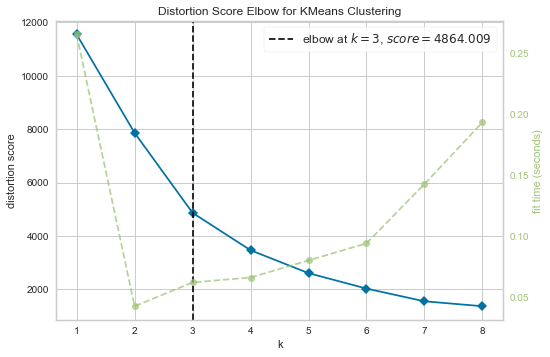

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [385]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,9))
visualizer.fit(X)
visualizer.show()

In [386]:
#Elbow Methods gives n=3. Hence, using Kmeans with n_clusters = 3
k_means = KMeans(n_clusters=3)
model = k_means.fit(X)
model

KMeans(n_clusters=3)

In [387]:
#Using the KMeans model to assign a cluster to each customer
RFMc['Cluster'] = k_means.predict(X)
RFMc

,Recency,Frequency,Monetary Value,Cluster
208,0,122,3122.82,1
139,3,8,677.0,1
3670,1,73,1757.55,1
2756,1,47,944.23,1
1364,7,4,89.0,0
...,...,...,...,...
2878,3,9,173.9,1
1727,6,7,80.82,0
2360,0,12,178.05,1
755,0,624,1776.98,1


In [388]:
#'RFMc0' is DataFrame of all customers of cluster 0
RFMc0 = RFMc[RFMc['Cluster']==0]
RFMc0

,Recency,Frequency,Monetary Value,Cluster
1364,7,4,89.0,0
736,8,58,1079.4,0
1072,7,13,459.4,0
366,4,23,552.0,0
2321,4,219,4008.62,0
...,...,...,...,...
1626,4,47,804.02,0
449,6,62,1306.68,0
2222,5,13,149.48,0
2280,5,1,25.5,0


In [419]:
#Basic statistics for CLuster 0
for col in ['Recency', 'Frequency', 'Monetary Value']:
    print(col)
    print("Min: ", RFMc0.loc[:,col].min())
    print("Median: ", RFMc0.loc[:,col].median())
    print("Mean: ", RFMc0.loc[:,col].mean())
    print("Max: ", RFMc0.loc[:,col].max())
    print("")
print("Total Monetary Value:", RFMc0['Monetary Value'].sum())  

Recency
Min:  4
Median:  6.0
Mean:  5.806378132118451
Max:  8

Frequency
Min:  1
Median:  18.0
Mean:  26.604783599088837
Max:  284

Monetary Value
Min:  2.9
Median:  314.95
Mean:  574.5736230068342
Max:  39916.5

Total Monetary Value: 504475.6410000004


<h4>The Occasional Customers (Cluster 0)</h4>
<b>Observations:</b><br>
1.Customers of this cluster havent made a purchase recently. On average, their last purchase was 5-6 months ago<br>
2.Their frequency is quite low as compared to customers in other clusters. Around 18-26 times.<br>
3.The Monetary Value which they have spent is also quite low at 300-575 sterlings.<br>
4.They have contributed 505K sterlings as revenue overall.<br>

<b>Inference:</b><br>
This cluster of customers may be occasional shoppers who purchase gifts from the store occasionally.<br>
They are not expected to be Wholesalers, but regular customers.

In [395]:
#'RFMc1' is DataFrame of all customers of cluster 1
RFMc1 = RFMc[RFMc['Cluster']==1]
RFMc1

,Recency,Frequency,Monetary Value,Cluster
208,0,122,3122.82,1
139,3,8,677.0,1
3670,1,73,1757.55,1
2756,1,47,944.23,1
291,1,23,539.81,1
...,...,...,...,...
3118,2,8,110.38,1
2878,3,9,173.9,1
2360,0,12,178.05,1
755,0,624,1776.98,1


In [420]:
#Basic statistics for CLuster 1
for col in ['Recency', 'Frequency', 'Monetary Value']:
    print(col)
    print("Min: ", RFMc1.loc[:,col].min())
    print("Median: ", RFMc1.loc[:,col].median())
    print("Mean: ", RFMc1.loc[:,col].mean())
    print("Max: ", RFMc1.loc[:,col].max())
    print("")
print("Total Monetary Value:", RFMc1['Monetary Value'].sum())  

Recency
Min:  0
Median:  1.0
Mean:  1.3031735313977042
Max:  3

Frequency
Min:  1
Median:  49.0
Mean:  86.27548953409858
Max:  1716

Monetary Value
Min:  0.0
Median:  790.6099999999999
Mean:  1704.2416046590158
Max:  65466.94000000001

Total Monetary Value: 5047963.633000005


<h4>The Routine Customers (Cluster 1)</h4>
<b>Observations:</b><br>
1.Customers of this cluster have made a  purchase very recently. Majority of them have made a purchase in the previous month (Nov'11). On average, their last purchase was 1.3 months ago<br>
2.Their frequency is around 50-85 times. These customers are quite frequent.<br>
3.The Monetary Value which they have spent is pretty high at around 800-1700 sterlings.<br>
4.This cluster has contributed 5.05 Million Sterlings overall. Hence, this cluster has the highest contribution to the store's revenue<br>

<b>Inference:</b><br>
This cluster of customers seem to be routine customers who purchase gifts from the store every alternate month.<br>
Some of them may be small wholesalers while others can be frequent shoppers.

In [397]:
#'RFMc2' is DataFrame of all customers of cluster 2
RFMc2 = RFMc[RFMc['Cluster']==2]
RFMc2

,Recency,Frequency,Monetary Value,Cluster
50,1,518,87071.79,2
46,0,3589,27409.71,2
2534,0,5111,65164.79,2
78,1,996,81882.76,2
140,0,1480,200877.6,2
51,0,4781,119034.28,2
690,0,245,160401.25,2
158,0,6782,34071.68,2
691,0,401,213908.45,2


In [421]:
#Basic statistics for CLuster 2
for col in ['Recency', 'Frequency', 'Monetary Value']:
    print(col)
    print("Min: ", RFMc2.loc[:,col].min())
    print("Median: ", RFMc2.loc[:,col].median())
    print("Mean: ", RFMc2.loc[:,col].mean())
    print("Max: ", RFMc2.loc[:,col].max())
    print("")
print("Total Monetary Value:", RFMc2['Monetary Value'].sum())  

Recency
Min:  0
Median:  0.0
Mean:  0.2222222222222222
Max:  1

Frequency
Min:  245
Median:  1480.0
Mean:  2655.8888888888887
Max:  6782

Monetary Value
Min:  27409.710000000006
Median:  87071.79000000002
Mean:  109980.25666666668
Max:  213908.45000000004

Total Monetary Value: 989822.3100000002


<h4>The VIP Customers (Cluster 2)</h4>
<b>Observations:</b><br>
1.Customers of this cluster have made a  purchase very very recently. Almost all of them make a purchase every month. On average, their last purchase was 0.2 months ago!<br>
2.Their frequency is around 1500-2500 times. These customers are very frequent.<br>
3.The Monetary Value which they have spent is very high at around 90K-110K sterlings.<br>
4.This cluster has contributed 0.99 Million Sterlings overall.<br>

<b>Inference:</b><br>
This cluster of customers seem to be VIP customers who purchase gifts in bulk from the store every month with very high frequency.<br>
Despite of only 9 customers in this cluster, they constritbute around 1 Million sterlings to the store.<br>
These customers may be large wholesalers who place large and frequent orders with the store.

<AxesSubplot:title={'center':'Recency'}, xlabel='Cluster'>

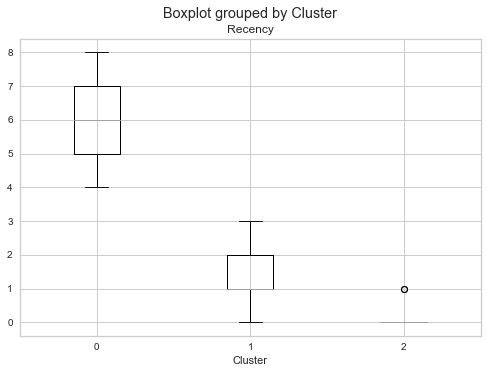

In [390]:
#Boxplot comparing Recency for each Cluster
RFMc.boxplot(column=['Recency'], by='Cluster')

<AxesSubplot:title={'center':'Frequency'}, xlabel='Cluster'>

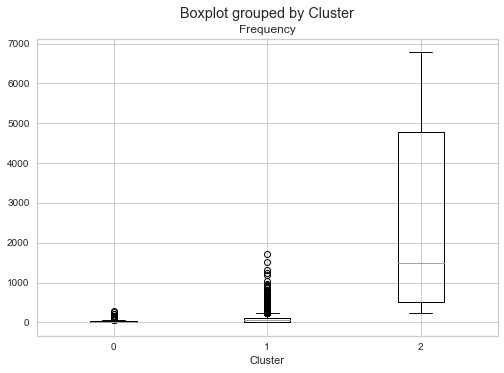

In [391]:
#Boxplot comparing Frequency for each Cluster
RFMc.boxplot(column=['Frequency'], by='Cluster')

<AxesSubplot:title={'center':'Monetary Value'}, xlabel='Cluster'>

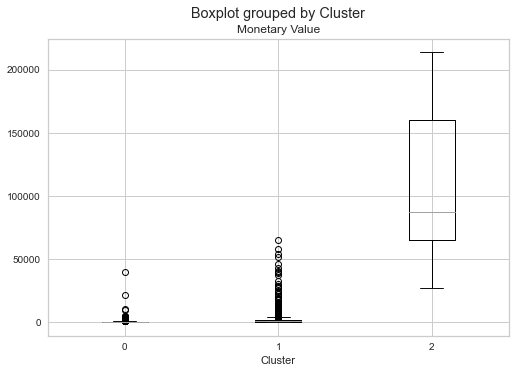

In [392]:
#Boxplot comparing Monetary Value for each Cluster
RFMc.boxplot(column=['Monetary Value'], by='Cluster')

Boxplots for Recency, Frequency and Monetary Value for each cluster confirm our inference for each group of "Occasional Customers", "Routine Customers" and "VIP Customers"

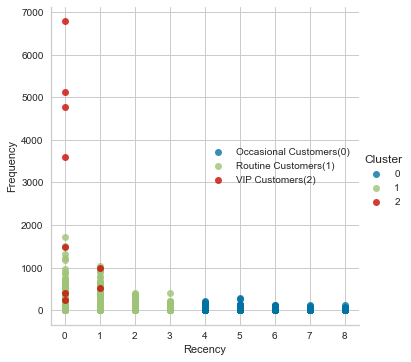

In [435]:
#Scatterplot: Frequency vs Recency
facet = sns.lmplot(data=RFMc, x='Recency', y='Frequency', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='right', labels=['Occasional Customers(0)', 'Routine Customers(1)' ,'VIP Customers(2)'])

From this scatterplot we can see that 'VIP Customers' have very low receny and very high frequency. Hence they occupy the left side of the plot<br>
'Routine Customers' have low to medium recency and low to medium frequency. Hence they occupy lower left side of the plot.<br>
'Occasional Customers' have very high recency and low frequency. Hence they occuoy the lower right side.<br>
However, some overlapp between clusters is observed

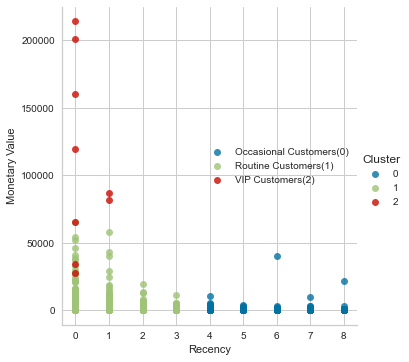

In [436]:
#Scatterplot: Monetary Value vs Recency
facet = sns.lmplot(data=RFMc, x='Recency', y='Monetary Value', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='right', labels=['Occasional Customers(0)', 'Routine Customers(1)' ,'VIP Customers(2)'])

From this scatterplot we can see that 'VIP Customers' have very low receny and very high Monetary Value. Hence they occupy the left side of the plot<br>
'Routine Customers' have low to medium recency and low to medium Monetary Value. Hence they occupy lower left side of the plot.<br>
'Occasional Customers' have very high recency and low Monetary Value. Hence they occuoy the lower right side.<br>
However, some overlapp between clusters is observed

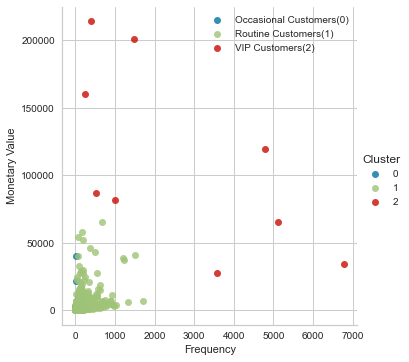

In [437]:
#Scatterplot: Monetary Value vs Frequency
ax = sns.lmplot(data=RFMc, x='Frequency', y='Monetary Value', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True, scatter=True)
plt.legend(loc='upper right', labels=['Occasional Customers(0)', 'Routine Customers(1)' ,'VIP Customers(2)'])

From this scatterplot we can see that 'VIP Customers' have very high frequency and very high Monetary Value. They are also very scattered.<br>
'Routine Customers' have low to medium Monetary Value and low to medium frequency. Hence they occupy lower left corner of the plot.<br>
'Occasional Customers' have low Monetary and low frequency. Hence they are located at the very corner on the left bottom. However, they are not cleary visible on the plot.<br>
However, some overlapp between clusters is observed

In [403]:
#Creating DataFrame 'RFMac' as a copy of 'RFM' but with 'CustomerID' removed.
#NaN values are also dropped as preparation for Agglomerative Clustering
RFMac = pd.DataFrame(columns=['Recency', 'Frequency', 'Monetary Value'])
RFMac['Recency'] = RFM['Recency'].dropna()
RFMac['Frequency'] = RFM['Frequency'].dropna()
RFMac['Monetary Value'] = RFM['Monetary Value'].dropna()
RFMac

,Recency,Frequency,Monetary Value
208,0,122,3122.82
139,3,8,677.0
3670,1,73,1757.55
2756,1,47,944.23
1364,7,4,89.0
...,...,...,...
2878,3,9,173.9
1727,6,7,80.82
2360,0,12,178.05
755,0,624,1776.98


In [404]:
Xac = StandardScaler().fit_transform(RFMac)
Xac

array([[-1.07288293,  0.21724776,  0.20395143],
       [ 0.309771  , -0.35435636, -0.14657353],
       [-0.61199829, -0.02844173,  0.0082865 ],
       ...,
       [-1.07288293, -0.33430007, -0.21808101],
       [-1.07288293,  2.7343115 ,  0.01107113],
       [-0.15111364, -0.04348394,  0.01971308]])

In [405]:
#As Elbow Methods gives n=3. Hence, using Agglomeration with n_clusters = 3
#Using the Agglomerative Clustering model to assign a cluster to each customer
ac = AgglomerativeClustering(n_clusters = 3)
RFMac['Cluster'] = ac.fit_predict(Xac)
RFMac

,Recency,Frequency,Monetary Value,Cluster
208,0,122,3122.82,1
139,3,8,677.0,1
3670,1,73,1757.55,1
2756,1,47,944.23,1
1364,7,4,89.0,2
...,...,...,...,...
2878,3,9,173.9,1
1727,6,7,80.82,2
2360,0,12,178.05,1
755,0,624,1776.98,1


In [406]:
#'RFMac0' is DataFrame of all customers of cluster 0
RFMac0 = RFMac[RFMac['Cluster']==0]
RFMac0

,Recency,Frequency,Monetary Value,Cluster
46,0,3589,27409.71,0
2534,0,5111,65164.79,0
140,0,1480,200877.6,0
51,0,4781,119034.28,0
690,0,245,160401.25,0
158,0,6782,34071.68,0
691,0,401,213908.45,0


In [422]:
#Basic statistics for CLuster 0
for col in ['Recency', 'Frequency', 'Monetary Value']:
    print(col)
    print("Min: ", RFMac0.loc[:,col].min())
    print("Median: ", RFMac0.loc[:,col].median())
    print("Mean: ", RFMac0.loc[:,col].mean())
    print("Max: ", RFMac0.loc[:,col].max())
    print("")
print("Total Monetary Value:", RFMac0['Monetary Value'].sum())  

Recency
Min:  0
Median:  0.0
Mean:  0.0
Max:  0

Frequency
Min:  245
Median:  3589.0
Mean:  3198.4285714285716
Max:  6782

Monetary Value
Min:  27409.710000000006
Median:  119034.28000000003
Mean:  117266.82285714288
Max:  213908.45000000004

Total Monetary Value: 820867.7600000001


From the cluster size and basic statistics, cluster 0 of Agglomerative Clustering represents the <b>"VIP Customers.</b><br>
Their observations and inferences are similar as before.<br>
However, one differece is seen that the difference between Mean and Mediam for all Recency, frequency and Monetary Value is lower in agglomeration than in KMeans

In [407]:
#'RFMac1' is DataFrame of all customers of cluster 1
RFMac1 = RFMac[RFMac['Cluster']==1]
RFMac1

,Recency,Frequency,Monetary Value,Cluster
208,0,122,3122.82,1
139,3,8,677.0,1
3670,1,73,1757.55,1
2756,1,47,944.23,1
291,1,23,539.81,1
...,...,...,...,...
3118,2,8,110.38,1
2878,3,9,173.9,1
2360,0,12,178.05,1
755,0,624,1776.98,1


In [423]:
#Basic statistics for CLuster 1
for col in ['Recency', 'Frequency', 'Monetary Value']:
    print(col)
    print("Min: ", RFMac1.loc[:,col].min())
    print("Median: ", RFMac1.loc[:,col].median())
    print("Mean: ", RFMac1.loc[:,col].mean())
    print("Max: ", RFMac1.loc[:,col].max())
    print("")
print("Total Monetary Value:", RFMac1['Monetary Value'].sum())  

Recency
Min:  0
Median:  1.0
Mean:  1.493563579277865
Max:  8

Frequency
Min:  1
Median:  47.0
Mean:  83.23328100470958
Max:  1716

Monetary Value
Min:  0.0
Median:  767.97
Mean:  1711.5585943485075
Max:  87071.79000000002

Total Monetary Value: 5451314.122999997


From the cluster size and basic statistics, cluster 1 of Agglomerative Clustering represents the <b>"Routine Customers.</b><br>
Their observations and inferences are similar as before.<br>
However, one differece is seen that the difference between Mean and Mediam for all Recency, frequency and Monetary Value is lower in agglomeration than in KMeans

In [408]:
#'RFMac2' is DataFrame of all customers of cluster 2
RFMac2 = RFMac[RFMac['Cluster']==2]
RFMac2

,Recency,Frequency,Monetary Value,Cluster
1364,7,4,89.0,2
736,8,58,1079.4,2
1072,7,13,459.4,2
559,6,16,241.61,2
2122,5,54,1710.39,2
...,...,...,...,...
953,7,26,466.71,2
449,6,62,1306.68,2
2222,5,13,149.48,2
2280,5,1,25.5,2


In [424]:
#Basic statistics for CLuster 2
for col in ['Recency', 'Frequency', 'Monetary Value']:
    print(col)
    print("Min: ", RFMac2.loc[:,col].min())
    print("Median: ", RFMac2.loc[:,col].median())
    print("Mean: ", RFMac2.loc[:,col].mean())
    print("Max: ", RFMac2.loc[:,col].max())
    print("")
print("Total Monetary Value:", RFMac2['Monetary Value'].sum())  

Recency
Min:  5
Median:  6.0
Mean:  6.397260273972603
Max:  8

Frequency
Min:  1
Median:  17.0
Mean:  23.32267884322679
Max:  158

Monetary Value
Min:  2.9
Median:  301.03
Mean:  411.08021461187207
Max:  3701.1600000000003

Total Monetary Value: 270079.70099999994


From the cluster size and basic statistics, cluster 2 of Agglomerative Clustering represents the <b>"Occasional Customers.</b><br>
Their observations and inferences are similar as before.<br>
However, one differece is seen that the difference between Mean and Mediam for all Recency, frequency and Monetary Value is lower in agglomeration than in KMeans

<h4>Hence it is observed that Difference between Mean and Median is lower in Agglomerative Clustering.</h4>
<h4> Hence it can be said that clusters obtained by Agglomeration are less skewed.</h4>
<h4>Thus, agglomeration provides better clustering prediction</h4>

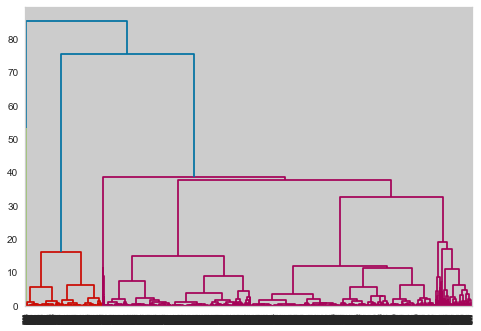

In [409]:
import scipy.cluster.hierarchy as shc
#Visualising clusters usind dendrogram
Dendrogram = shc.dendrogram((shc.linkage(Xac, method ='ward')))

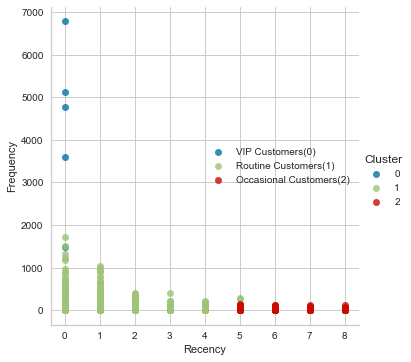

In [427]:
facet2a = sns.lmplot(data=RFMac, x='Recency', y='Frequency', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='right', labels=['VIP Customers(0)', 'Routine Customers(1)', 'Occasional Customers(2)'])

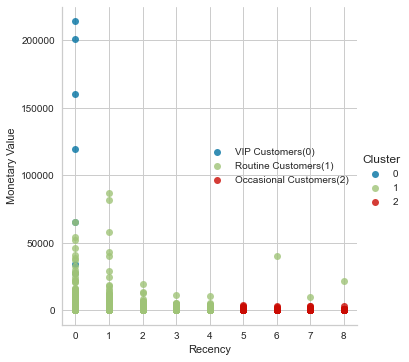

In [433]:
facet2b = sns.lmplot(data=RFMac, x='Recency', y='Monetary Value', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='right', labels=['VIP Customers(0)', 'Routine Customers(1)', 'Occasional Customers(2)'])

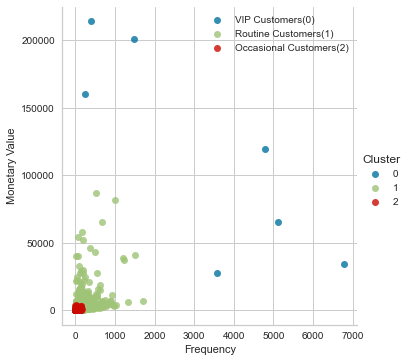

In [430]:
facet2c = sns.lmplot(data=RFMac, x='Frequency', y='Monetary Value', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.legend(loc='upper right', labels=['VIP Customers(0)', 'Routine Customers(1)', 'Occasional Customers(2)'])

<h4>Even in these 3 scatterplots, it is seen that the cluster boundaries are much more clearer. They do not mix up with other clusters and have greater intra-cluster similarity<h4>
<h4>Hence Agglomerative Clustering yeilds better cluster predictions in this case</h4>